In [1]:
import safe
from rdkit import Chem
from rdkit.Chem import Draw

/home/hieu/miniconda3/envs/mlmat/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 Smiles: CC(Cc1ccc(cc1)C(C(=O)O)C)C
 Encoded safe smiles: c12ccc3cc1.C3(C)C(=O)O.CC(C)C2
 Smiles: C1=CC=CC=C1
 Encoded safe smiles: c1ccccc1
 Smiles: CC12C34C5C13C524
 Encoded safe smiles: CC12C34C5C13C524
 Smiles: CC1(C)C=N1
 Encoded safe smiles: CC1(C)C=N1
 Smiles: C12C=C1.OO2
 Encoded safe smiles: C13C=C1.OO3


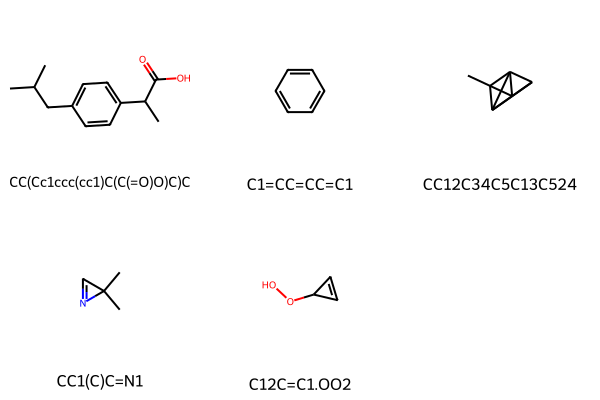

In [8]:
# Load smiles and convert to safe format
smiList = ['CC(Cc1ccc(cc1)C(C(=O)O)C)C', 'C1=CC=CC=C1','CC12C34C5C13C524', 'CC1(C)C=N1','C12C=C1.OO2']  

for smiles in smiList:
    print(f' Smiles: {smiles}')
    try:
        smiles_sf= safe.encode(smiles)
    except Exception:
        smiles_sf = Chem.MolToSmiles(Chem.MolFromSmiles(smiles))
    print(f' Encoded safe smiles: {smiles_sf}')
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiList], molsPerRow=3, subImgSize=(200,200), legends=smiList)

In [3]:
smiList = open('data/1to6.dmu.smi', 'r').read().splitlines()
smiList[1000:1010]

['CC1(O)C#C1',
 'NC1(N)C#C1',
 'NC1(O)C#C1',
 'OC1(O)C#C1',
 'CC1(C)C=C1',
 'CC1(C)C=N1',
 'CC1(C)N=N1',
 'CC1(N)C=C1',
 'CC1(N)C=N1',
 'CC1(N)N=N1']

In [4]:
smiList_sf = []
for smiles in smiList:
    try:
        smiles_sf= safe.encode(smiles)
    except Exception:
        smiles_sf = Chem.MolToSmiles(Chem.MolFromSmiles(smiles))
    smiList_sf.append(smiles_sf)
    
smiList_sf[:10],  smiList_sf[-10:]

[08:34:42] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


(['C', 'N', 'O', 'C#C', 'C#N', 'N#N', 'C=C', 'C=N', 'C=O', 'N=N'],
 ['CC12C34C5C13C524',
  'CC12C34N5C13C524',
  'NC12C34C5C13C524',
  'NC12C34N5C13C524',
  'OC12C34C5C13C524',
  'OC12C34N5C13C524',
  'C12C34C5C16C23C546',
  'C12C34N5C16C23C546',
  'N12C34N5C16C23C546',
  'C123C45C16C21C34C561'])

In [7]:
# Save the safe smiles
with open('data/1to6.dmu.safe', 'w') as f:
    for item in smiList_sf:
        f.write("%s\n" % item)